In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import myplotlib as my

# Make some data

In [3]:
np.random.seed(1789)
variables = ["a", "b", "c", "d", "e", "f", "g", "h"]
data = pd.DataFrame(
    {
        v: np.random.normal(
            loc=np.random.uniform(), scale=np.random.uniform(0.5, 1.0), size=50
        )
        for v in variables
    }
)
data.columns.name = "Group"

data.head(3)

Group,a,b,c,d,e,f,g,h
0,1.588306,0.971685,0.606558,0.516185,0.843439,-0.225148,1.354711,1.249664
1,1.174866,0.055137,1.349762,-0.086123,-0.600973,0.652569,0.843556,0.135153
2,-0.050872,0.701834,0.615869,0.071945,-0.018571,0.980543,0.087248,0.811316


# Plots

## Histogram

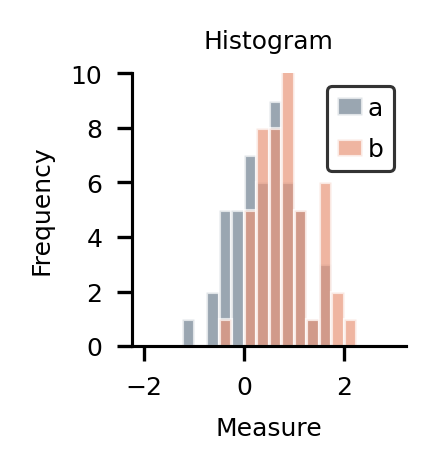

In [4]:
bins = np.linspace(-2, 3, 21)
fig, ax = plt.subplots(dpi=300, figsize=my.utilities.cm2inch(3, 3))

ax = my.plots.hist(data["a"], ax=ax, bins=bins, alpha=0.7, label="a")
ax = my.plots.hist(data["b"], ax=ax, bins=bins, alpha=0.7, label="b")
ax.legend()
ax.set_xlabel("Measure")
ax.set_ylabel("Frequency")
ax.set_ylim(0, 10)
ax.set_title("Histogram")
plt.savefig("examples/histogram.png", bbox_inches="tight")

## Scatter

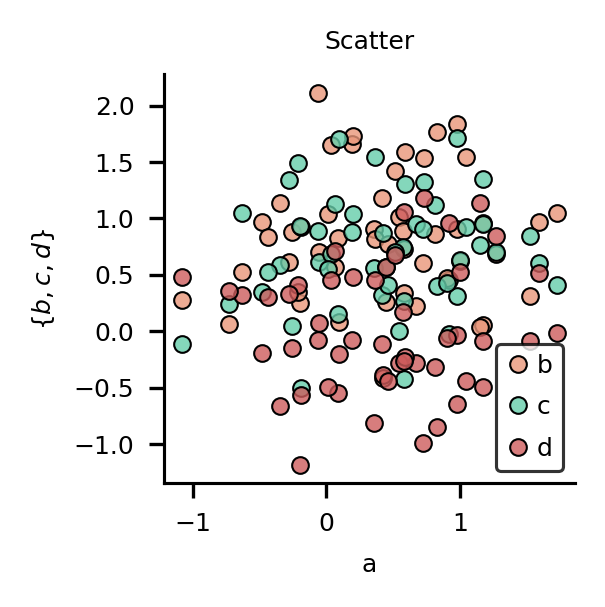

In [5]:
# Create a figure and axis object
fig = plt.figure(dpi=300, figsize=my.utilities.cm2inch(4.5, 4.5))
ax = plt.gca()

# Make an empty plot to skip the first color
# (so that mapping of variables to colors in this demo are consistent):
my.plots.scatter([], [], ax=ax)
# Plot the data
my.plots.scatter(data["a"], data["b"], label="b", ax=ax)
my.plots.scatter(data["a"], data["c"], label="c", ax=ax)
ax = my.plots.scatter(data["a"], data["d"], label="d", ax=ax)

# Add some labels
ax.set_xlabel("a")
ax.set_ylabel(r"$\{b, c, d\}$")
ax.legend()
ax.set_title("Scatter")

# Save the result
plt.savefig("examples/scatter.png", bbox_inches="tight")

## Violin

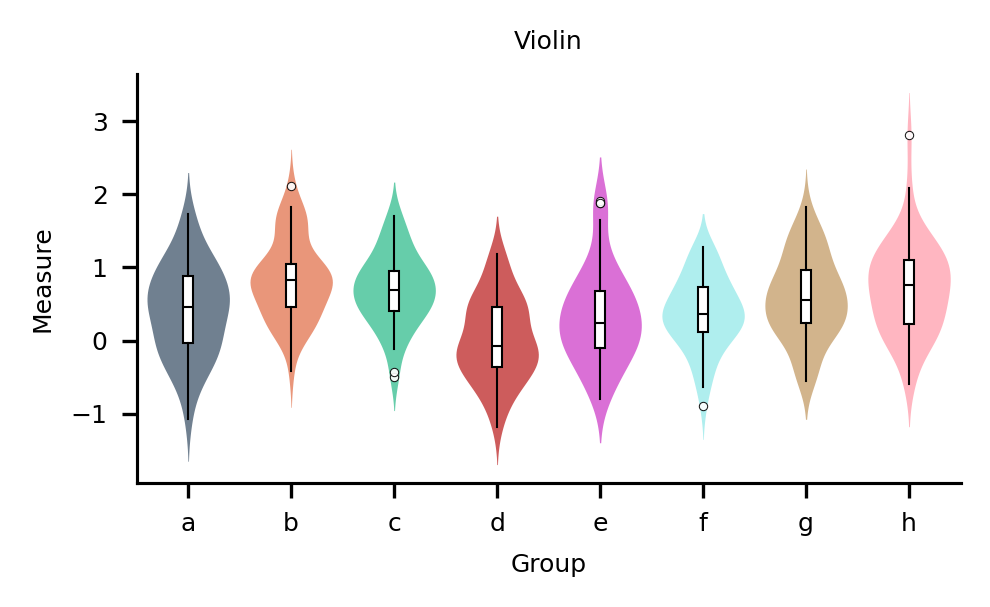

In [6]:
fig, ax = plt.subplots(dpi=300, figsize=my.utilities.cm2inch(9, 4.5))
ax = my.plots.violin(data, value_name="Measure", ax=ax)
ax.set_title("Violin")
plt.savefig("examples/violin.png", bbox_inches="tight")

## Raincloud

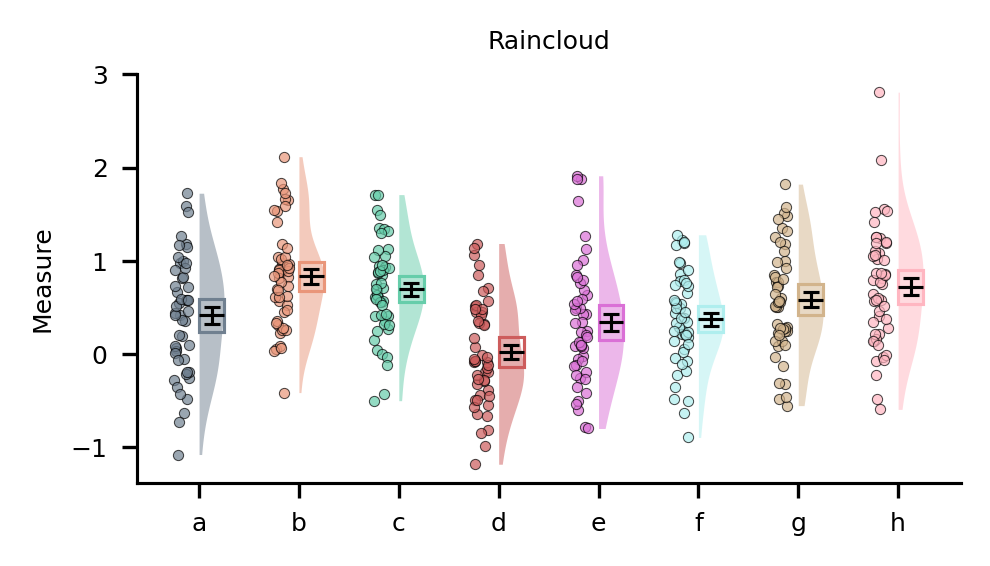

In [7]:
fig, ax = plt.subplots(dpi=300, figsize=my.utilities.cm2inch(9, 4.5))
ax = my.plots.raincloud(data, ax=ax)
ax.set_ylabel("Measure")
ax.set_title("Raincloud")
plt.savefig("examples/raincloud.png", bbox_inches="tight")

## Linear model

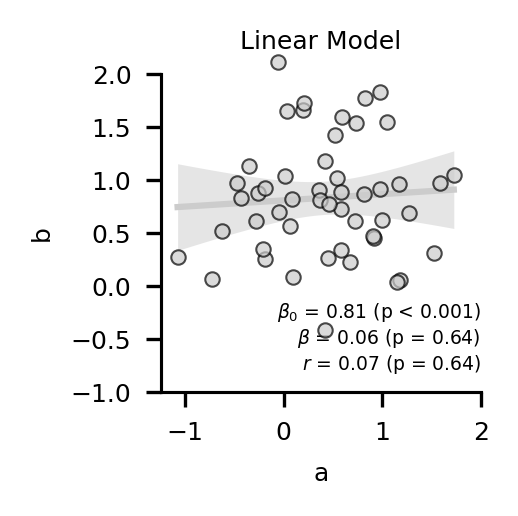

In [8]:
fig = plt.figure(dpi=300, figsize=my.utilities.cm2inch(3.5, 3.5))
ax = my.lm(data["a"], data["b"], color="#CCCCCC", annotation_pos="lower right")
ax.set_xlim(-1.25, 2)
ax.set_xlabel("a")
ax.set_ylim(-1, 2)
ax.set_ylabel("b")
ax.set_title("Linear Model")
plt.savefig("examples/lm.png", bbox_inches="tight")

## Factorial Heatmap

For this plot, we need to make a different dataset first:

In [9]:
import itertools


def product_dict(**kwargs):
    keys = kwargs.keys()
    vals = kwargs.values()
    for instance in itertools.product(*vals):
        yield dict(zip(keys, instance))


np.random.seed(1)
df = pd.DataFrame(
    list(
        product_dict(
            x0=[0, 1, 2], x1=[0, 1], x2=[0, 1, 2], x3=[0, 1, 2], x4=[0, 1], x5=[0, 1, 2]
        )
    )
)
betas = np.random.normal(size=6)
df["y"] = df[["x0", "x1", "x2", "x3", "x4", "x5"]].values.dot(betas)
df.head()

,x0,x1,x2,x3,x4,x5,y
0,0,0,0,0,0,0,0.000000
1,0,0,0,0,0,1,-2.301539
2,0,0,0,0,0,2,-4.603077
3,0,0,0,0,1,0,0.865408
4,0,0,0,0,1,1,-1.436131


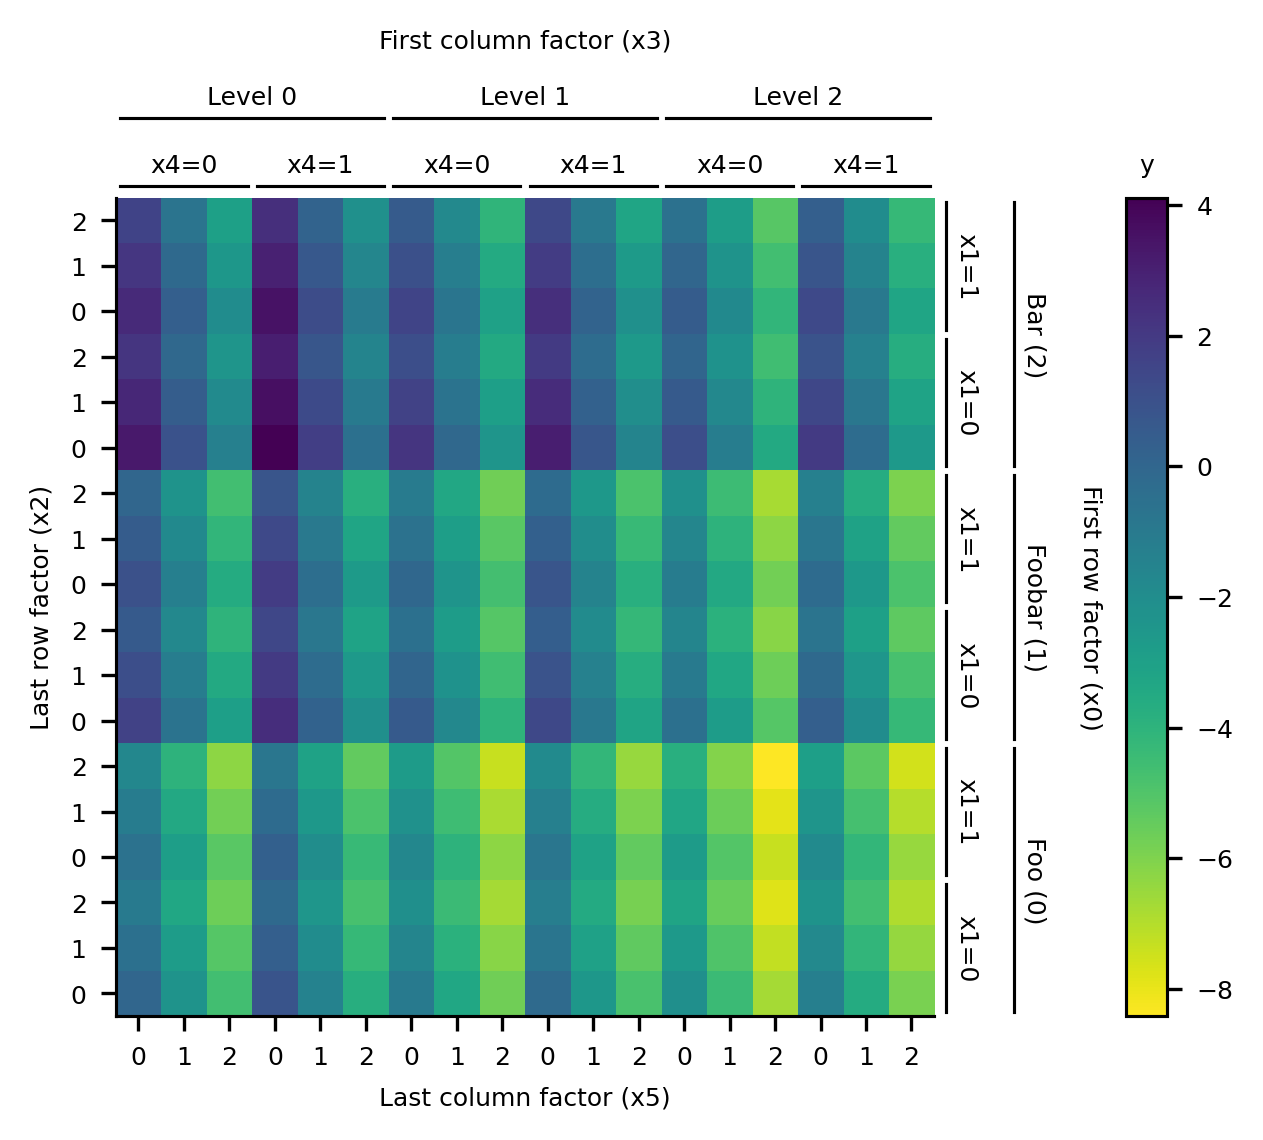

In [10]:
fig, ax = plt.subplots(figsize=my.utilities.cm2inch(14, 9), dpi=300)
ax = my.plots.factorial_heatmap(
    df,
    row_factors=["x0", "x1", "x2"],
    col_factors=["x3", "x4", "x5"],
    value_var="y",
    factor_labels={"x2": "Last row factor (x2)", "x5": "Last column factor (x5)"},
    level_labels={
        "x0": {0: "Foo (0)", 1: "First row factor (x0)\n\nFoobar (1)", 2: "Bar (2)"},
        "x3": {0: "Level 0", 1: "First column factor (x3)\n\nLevel 1", 2: "Level 2"},
    },
)
plt.savefig("examples/factorial_heatmap.png", bbox_inches="tight")

## Model recovery plot

In [11]:
np.random.seed(1)
n_models = 5
model_labels = [f"Model {m}" for m in range(n_models)]

# Simulate model posterior probabilities
mpp = np.random.uniform(size=(n_models, n_models)) ** 3
mpp = (mpp / mpp.sum(axis=1)[:, np.newaxis]).round(2)

# Simulate random model exceedance probabilities
xp = mpp**5
xp = (xp / xp.sum(axis=1)[:, np.newaxis]).round(2)

mpp, xp

(array([[0.15, 0.78, 0.  , 0.06, 0.01],
        [0.  , 0.02, 0.15, 0.23, 0.58],
        [0.07, 0.3 , 0.01, 0.63, 0.  ],
        [0.54, 0.13, 0.31, 0.  , 0.01],
        [0.21, 0.37, 0.01, 0.14, 0.27]]),
 array([[0.  , 1.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.01, 0.99],
        [0.  , 0.02, 0.  , 0.98, 0.  ],
        [0.94, 0.  , 0.06, 0.  , 0.  ],
        [0.05, 0.79, 0.  , 0.01, 0.16]]))

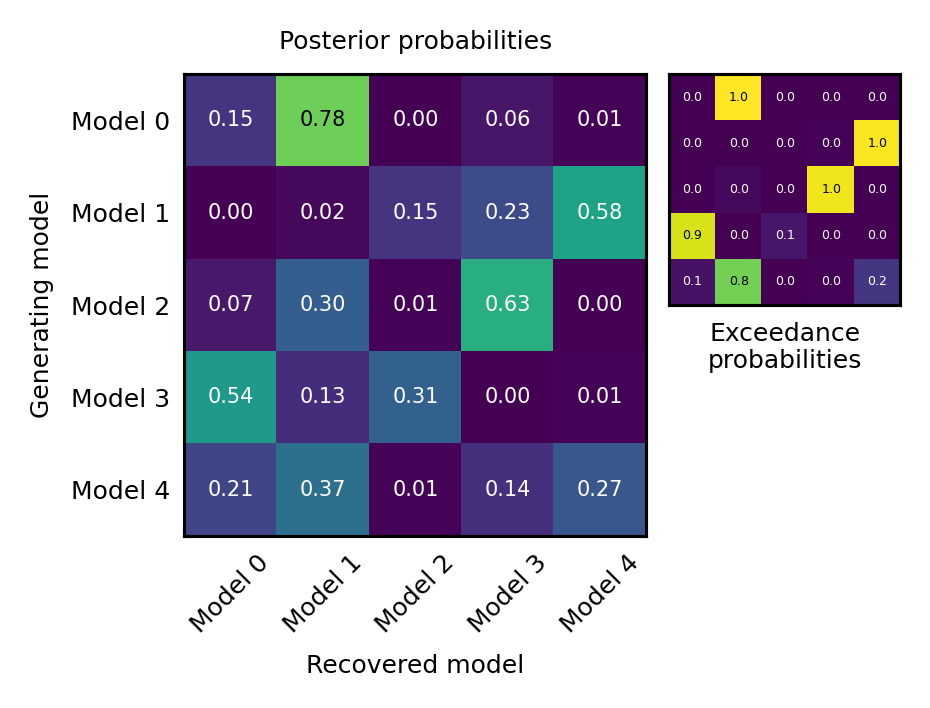

In [12]:
ax = my.plots.model_recovery(
    mpp=mpp, xp=xp, model_labels=model_labels, round_inset_values=1, inset_aspect=1
)
plt.savefig("examples/model_recovery.png", bbox_inches="tight")

# Utilities
## Bar annotation

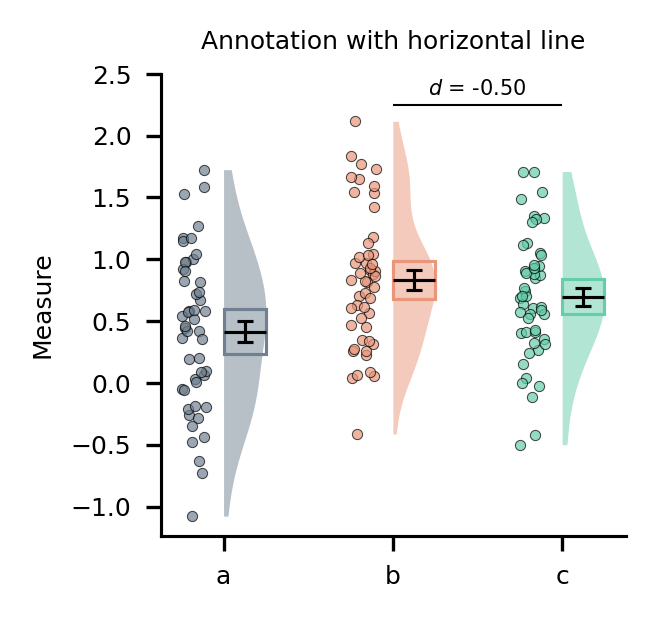

In [13]:
# Make a raincloud plot to annotate
ax = my.plots.raincloud(data[["a", "b", "c"]])
ax.set_ylabel("Measure")
ax.set_ylim(None, 2.5)

# Annotation with an effect size of the difference
## Compute effect size d
sd_pooled = np.sqrt(np.std(data["a"]) ** 2 + np.std(data["b"]) ** 2)
d = (np.mean(data["a"]) - np.mean(data["b"])) / sd_pooled

# Make annotation
ax = my.annotation.hTextLine(
    text="$d$ = {d:.2f}".format(d=d), x0=1, x1=2, y=2.25, ax=ax, lineTextGap=0.05
)
ax.set_title("Annotation with horizontal line")
plt.savefig("examples/hTextLine.png", bbox_inches="tight")

## P-value formatting

There's also a function to format p-values into nicer strings:

In [14]:
for p in [0.000000000001, 0.002, 0.032, 0.091, 0.35]:
    print(p, "\tis formatted as\t", f'"{my.annotation.format_p(p)}"')

1e-12 	is formatted as	 "p < 0.001"
0.002 	is formatted as	 "p = 0.002"
0.032 	is formatted as	 "p = 0.032"
0.091 	is formatted as	 "p = 0.091"
0.35 	is formatted as	 "p = 0.35"


There are some settings to customize this:
- `lower_cutoff` determines the value below which values are shown with "<".
- values higher than `upper_cutoff` are rounded to two digits, below to three.
- `ns` can be set to `True`. In this case, values higher than `upper_cutoff` are just marked "n.s."

In [15]:
for p in [0.000000000001, 0.002, 0.032, 0.091, 0.35]:
    print(
        p,
        "\tis formatted as\t",
        f'"{my.annotation.format_p(p, lower_cutoff=0.0001, upper_cutoff=0.05, ns=True)}"',
    )

1e-12 	is formatted as	 "p < 0.001"
0.002 	is formatted as	 "p = 0.002"
0.032 	is formatted as	 "p = 0.032"
0.091 	is formatted as	 "n.s."
0.35 	is formatted as	 "n.s."


## Axis labelling

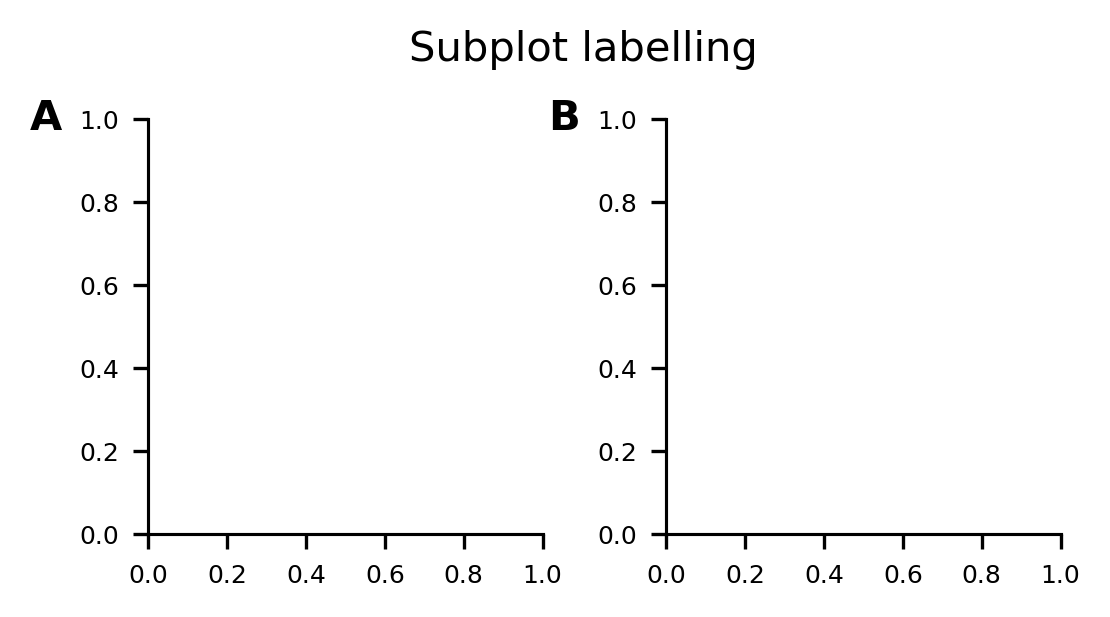

In [16]:
fig, axs = plt.subplots(1, 2, figsize=my.utilities.cm2inch(9, 4.5))

fig.tight_layout()
my.utilities.label_axes(
    fig,
    loc=(-0.3, 1.05),  # in axis-fraction
    labels=["A", "B"],  # defaults to lowercase if labels=NOne
    fontsize=10,
    fontweight="bold",
)
fig.suptitle("Subplot labelling", y=1.1, fontsize=10)
plt.savefig("examples/labelAxes.png", bbox_inches="tight")

## Axis breaking

**Note that this is purely visual, and does not change the actual plotted data**. I use it to better communicate if I set limits so that 0 is excluded from the range of values, but still want the axis origin to be labelled 0.

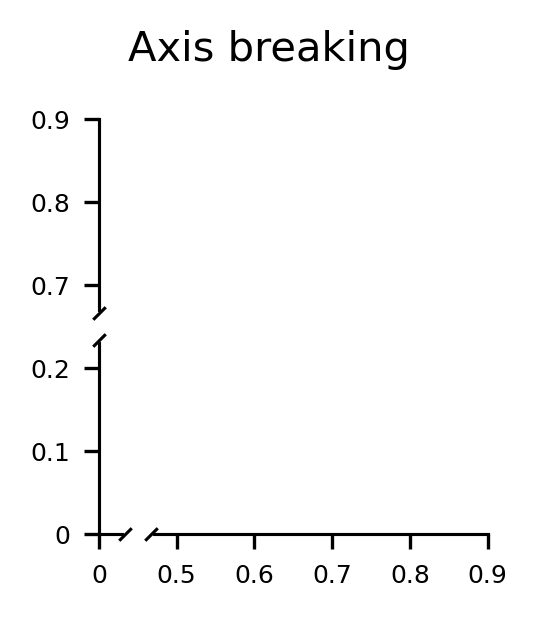

In [17]:
fig, ax = plt.subplots(1, 1, figsize=my.utilities.cm2inch(4.5, 4.5))
fig.tight_layout()

# Set ticks and labels for full control
## x-axis: Break after the first tick
xticks = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
xticklabels = xticks.copy()
xticklabels[0] = 0  # change first label
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)

## y-axis: Break after the third tick
yticks = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
yticklabels = yticks.copy()
yticklabels[:3] = [0, 0.1, 0.2]  # change first three labels
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

# Limits
ax.set_xlim(xticks[0], xticks[-1])
ax.set_ylim(yticks[0], yticks[-1])

# Break axes
my.utilities.break_after_nth_tick(ax=ax, n=0, axis="x")
my.utilities.break_after_nth_tick(ax=ax, n=2, axis="y")

# Save
fig.suptitle("Axis breaking", y=1.1, fontsize=10)
plt.savefig("examples/breakAxes.png", bbox_inches="tight")

# Compositing

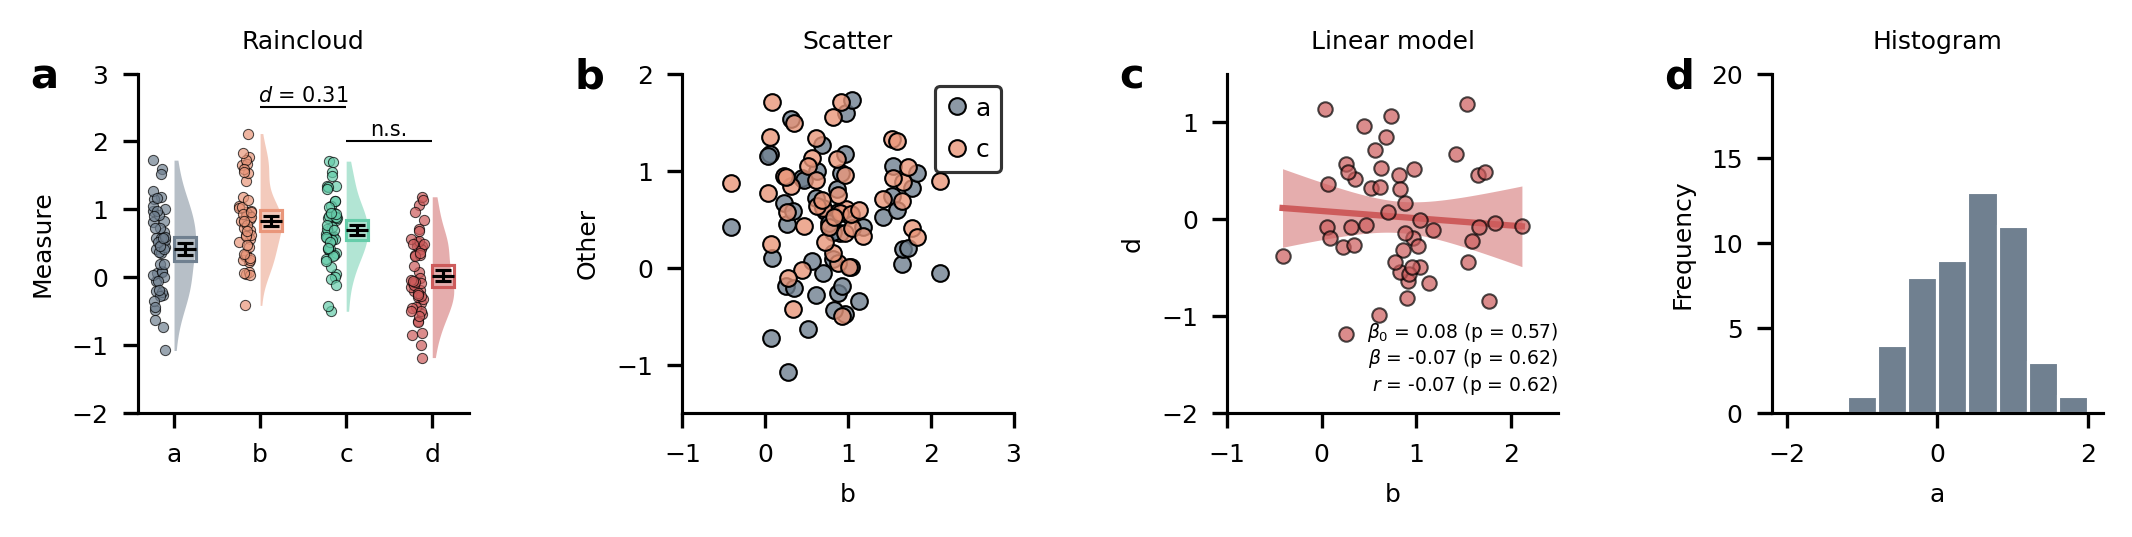

In [18]:
from scipy.stats import ttest_ind

fig, axs = plt.subplots(1, 4, figsize=my.utilities.cm2inch(4 * 4.5, 4.5))

# Raincloud Plot
axs[0] = my.plots.raincloud(data[["a", "b", "c", "d"]], ax=axs[0])
axs[0].set_ylabel("Measure")
axs[0].set_title("Raincloud")

# Annotations
d = np.mean(data["b"]) - np.mean(data["c"]) / np.sqrt(
    np.std(data["b"] ** 2) + np.std(data["c"] ** 2)
)
axs[0] = my.annotation.hTextLine(
    text="$d$ = {d:.2f}".format(d=d), x0=1, x1=2, y=2.5, ax=axs[0], lineTextGap=0.03
)

tval, pval = ttest_ind(data["c"], data["b"], equal_var=False)
axs[0] = my.annotation.hTextLine(
    text=my.annotation.format_p(pval, ns=True),
    x0=2,
    x1=3,
    y=2,
    lineTextGap=0.03,
    ax=axs[0],
)

axs[0].set_ylim(-2, 3)

# Scatter Plot
axs[1] = my.plots.scatter(data["b"], data["a"], label="a", ax=axs[1])
axs[1].plot([])  # skip color in cycle
axs[1] = my.plots.scatter(data["b"], data["c"], label="c", ax=axs[1])
axs[1].set_xlim(-1, 3)
axs[1].set_ylim(-1.5, 2)
axs[1].set_xlabel("b")
axs[1].set_ylabel("Other")
axs[1].legend()
axs[1].set_title("Scatter")

# LM Plot
for i in range(3):
    axs[2].plot(
        []
    )  # skip first colors so that relations of colors to variables are constant

my.plots.lm(data["b"], data["d"], ax=axs[2])
axs[2].set_xlabel("b")
axs[2].set_ylabel("d")
axs[2].set_xlim(-1, 2.5)
axs[2].set_ylim(-2, 1.5)
axs[2].set_title("Linear model")


# Histogram
axs[3] = my.plots.hist(data["a"], bins=np.linspace(-2, 2, 11))
axs[3].set_ylabel("Frequency")
axs[3].set_ylim(0, 20)
axs[3].set_title("Histogram")
axs[3].set_xlabel("a")

# Labelling
fig.tight_layout(w_pad=3)
my.utilities.label_axes(fig, loc=(-0.325, 1.05), fontsize=10, fontweight="bold")

plt.savefig("examples/combination.png")